<a href="https://colab.research.google.com/github/manallabied/pi_projet/blob/main/Pi_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving txt.txt to txt.txt


In [ ]:
file = open("txt.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'الأهداف الاستراتيجية والأهداف المرحلية والأهداف العامة والأهداف الخاصة، وفي سبيل توضيح ذلك للناس تُعقد الدورات التدريبية وتقام المحاضرات وتؤلف الكتب وتنشر المقالات موضحة أهمية الأهداف وطرق صياغتها ومواصفاتها. هذا النشاط المهتم بصناعة الأهداف يُعد من الأمور الجيدة والمفيدة، ولكنه في كثير من الحالات لا يُحقق الأهداف الحقيقية منه، مما يعكس وجود مشكلة في التفكير، وضعف في إدراك الأهداف من وضع الأهداف! إنّ الإنسان الذي لا يعرف وجهته في هذه الحياة وليس لديه أهداف يعمل لتحقيقها، يعيش دون أن يدرك هل هو ض'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[36, 353, 88, 354, 88, 355, 88, 356, 61, 357, 358, 14, 359, 360, 361]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1260


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  2254


array([[ 36, 353,  88, 354],
       [353,  88, 354,  88],
       [ 88, 354,  88, 355],
       [354,  88, 355,  88],
       [ 88, 355,  88, 356],
       [355,  88, 356,  61],
       [ 88, 356,  61, 357],
       [356,  61, 357, 358],
       [ 61, 357, 358,  14],
       [357, 358,  14, 359]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 36 353  88]
 [353  88 354]
 [ 88 354  88]
 [354  88 355]
 [ 88 355  88]
 [355  88 356]
 [ 88 356  61]
 [356  61 357]
 [ 61 357 358]
 [357 358  14]]
Response:  [354  88 355  88 356  61 357 358  14 359]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             12600     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 1260)              1261260   
                                                                 
Total params: 14,322,860
Trainable params: 14,322,860
Non-trainable params: 0
_________________________________________________________________


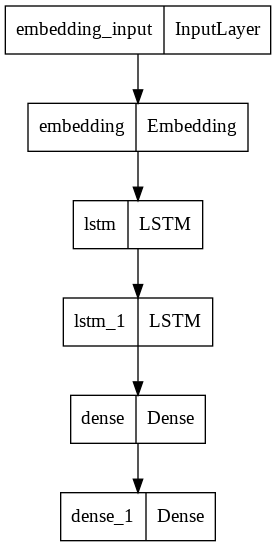

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=2000, batch_size=64, callbacks=[checkpoint])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 751/2000
33/36 [==========================>...] - ETA: 0s - loss: 0.0153
Epoch 751: loss did not improve from 0.01433
36/36 [==============================] - 1s 14ms/step - loss: 0.0153
Epoch 752/2000
33/36 [==========================>...] - ETA: 0s - loss: 0.0156
Epoch 752: loss did not improve from 0.01433
36/36 [==============================] - 1s 14ms/step - loss: 0.0154
Epoch 753/2000
33/36 [==========================>...] - ETA: 0s - loss: 0.0159
Epoch 753: loss did not improve from 0.01433
36/36 [==============================] - 1s 14ms/step - loss: 0.0154
Epoch 754/2000
33/36 [==========================>...] - ETA: 0s - loss: 0.0146
Epoch 754: loss did not improve from 0.01433
36/36 [==============================] - 1s 14ms/step - loss: 0.0151
Epoch 755/2000
33/36 [==========================>...] - ETA: 0s - loss: 0.0150
Epoch 755: loss did not improve from 0.01433
36/36 [===================

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: جانيت تُحدق مشدوهةً 
['تُحدق', 'مشدوهةً', '']
1/1 [==============================] - 0s 18ms/step
فلا
Enter your line: موجة ضحك هستيرية
['موجة', 'ضحك', 'هستيرية']
1/1 [==============================] - 0s 19ms/step
تمتد
Enter your line: استقاموا فلا خوف
['استقاموا', 'فلا', 'خوف']
1/1 [==============================] - 0s 15ms/step
عليهم
Enter your line: اقترب الكائن ليُحيط
['اقترب', 'الكائن', 'ليُحيط']
1/1 [==============================] - 0s 17ms/step
جانيت
Enter your line:  نشيطة  تحب تقديم 
['تحب', 'تقديم', '']
1/1 [==============================] - 0s 18ms/step
أساسية
Enter your line:  لونهما من لون
['لونهما', 'من', 'لون']
1/1 [==============================] - 0s 16ms/step
شعره
